<ipython-input-4-bb30d9b65d87>:17: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


MAE: 6.13
RMSE: 10.51
R² Score: -0.21


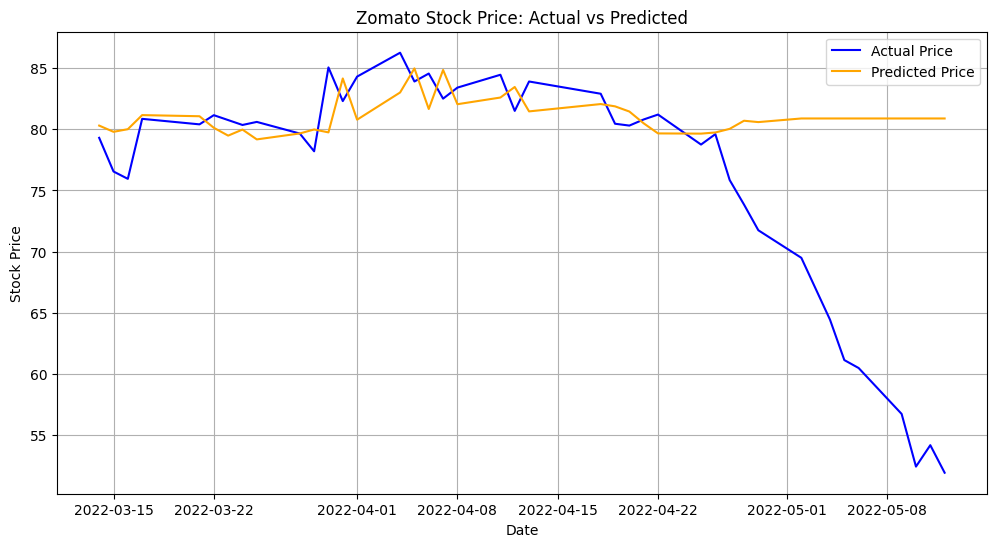

In [4]:
import pandas as pd

import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



df = pd.read_csv('zomato (1).csv')

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)




df['Close_1'] = df['Close'].shift(1)

df['Close_2'] = df['Close'].shift(2)

df['Close_3'] = df['Close'].shift(3)


df.dropna(inplace=True)



X = df[['Close_1', 'Close_2', 'Close_3']]

y = df['Close']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)




model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)



predictions = model.predict(X_test)



mae = mean_absolute_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

r2 = r2_score(y_test, predictions)


print(f"MAE: {mae:.2f}")

print(f"RMSE: {rmse:.2f}")

print(f"R² Score: {r2:.2f}")



plt.figure(figsize=(12, 6))

plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')

plt.plot(y_test.index, predictions, label='Predicted Price', color='orange')

plt.title('Zomato Stock Price: Actual vs Predicted')

plt.xlabel('Date')

plt.ylabel('Stock Price')

plt.legend()

plt.grid(True)

plt.show()